<a href="https://colab.research.google.com/github/vishnugandra/AIML_2303A52194/blob/main/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
fetch_openml(data_id=10)

{'data':     lymphatics block_of_affere bl_of_lymph_c bl_of_lymph_s by_pass  \
 0       arched             yes            no            no      no   
 1    displaced             yes            no            no     yes   
 2     deformed              no            no            no     yes   
 3       arched              no            no            no      no   
 4       arched              no            no            no      no   
 ..         ...             ...           ...           ...     ...   
 143  displaced              no            no            no      no   
 144   deformed              no            no            no      no   
 145   deformed             yes            no            no     yes   
 146   deformed             yes            no            no      no   
 147     arched              no            no            no      no   
 
     extravasates regeneration_of early_uptake_in  lym_nodes_dimin  \
 0             no              no             yes                1  

In [ ]:
fetch_openml(name='car')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name car exist. Versions may be fundamentally different, returning version 2. Available versions:
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=991
- version 3, status: active
  url: https://www.openml.org/search?type=data&id=40975

  warn(warning_msg)


{'data':      buying  maint  doors persons lug_boot safety
 0     vhigh  vhigh      2       2    small    low
 1     vhigh  vhigh      2       2    small    med
 2     vhigh  vhigh      2       2    small   high
 3     vhigh  vhigh      2       2      med    low
 4     vhigh  vhigh      2       2      med    med
 ...     ...    ...    ...     ...      ...    ...
 1723    low    low  5more    more      med    med
 1724    low    low  5more    more      med   high
 1725    low    low  5more    more      big    low
 1726    low    low  5more    more      big    med
 1727    low    low  5more    more      big   high
 
 [1728 rows x 6 columns],
 'target': 0       P
 1       P
 2       P
 3       P
 4       P
        ..
 1723    N
 1724    N
 1725    P
 1726    N
 1727    N
 Name: binaryClass, Length: 1728, dtype: category
 Categories (2, object): ['N', 'P'],
 'frame':      buying  maint  doors persons lug_boot safety binaryClass
 0     vhigh  vhigh      2       2    small    low           P

In [ ]:
fetch_openml(data_id=5)

{'data':      age sex  height  weight  QRSduration  PRinterval  Q-Tinterval  Tinterval  \
 0     75   0     190      80           91         193          371        174   
 1     56   1     165      64           81         174          401        149   
 2     54   0     172      95          138         163          386        185   
 3     55   0     175      94          100         202          380        179   
 4     75   0     190      80           88         181          360        177   
 ..   ...  ..     ...     ...          ...         ...          ...        ...   
 447   53   1     160      70           80         199          382        154   
 448   37   0     190      85          100         137          361        201   
 449   36   0     166      68          108         176          365        194   
 450   32   1     155      55           93         106          386        218   
 451   78   1     160      70           79         127          364        138   
 
      

#Loading the data

In [ ]:
from sklearn.datasets import fetch_openml
car_data=fetch_openml(name='car',version=2,parser='auto')

In [ ]:
type(car_data)

sklearn.utils._bunch.Bunch

In [ ]:
car_data.details

{'id': '991',
 'name': 'car',
 'version': '2',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-04T22:44:31',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53525/car.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'file_id': '53525',
 'default_target_attribute': 'binaryClass',
 'tag': ['Chemistry',
  'derived',
  'Life Science',
  'mythbusting_1',
  'study_1',
  'study_15',
  'study_20',
  'study_41',
  'study_7'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:17:54',
 'md5_checksum': '49c57b793eef1b8e55f297e5e019fdbf'}

In [ ]:
car_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
car_data.details['version']

'2'

In [ ]:
car_data.feature_names,car_data.target,car_data.categories

(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
 0       P
 1       P
 2       P
 3       P
 4       P
        ..
 1723    N
 1724    N
 1725    P
 1726    N
 1727    N
 Name: binaryClass, Length: 1728, dtype: category
 Categories (2, object): ['N', 'P'],
 None)

In [ ]:
car_data.target.value_counts()

,count
binaryClass,
P,1210
N,518


In [ ]:
car_data=car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [ ]:
car_data=car_data.frame
car_data.head

AttributeError: 'DataFrame' object has no attribute 'frame'

#Exploratory Analysis

<Axes: xlabel='binaryClass', ylabel='count'>

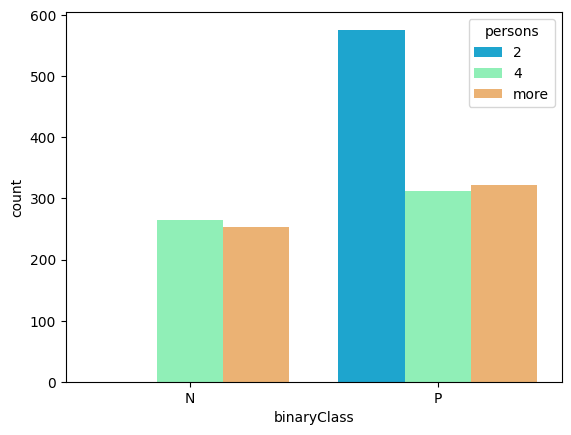

In [ ]:
sns.countplot(x=car_data.binaryClass,hue='persons',data=car_data,palette='rainbow')

<Axes: xlabel='binaryClass', ylabel='count'>

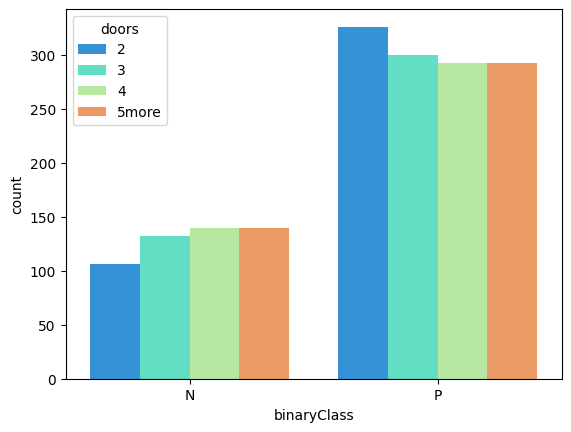

In [ ]:
sns.countplot(x=car_data.binaryClass,hue='doors',data=car_data,palette='rainbow')

Splitiing data into Training and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(car_data,test_size=0.2,random_state=20)
print("Training data is: {}\n testing data is: {}".format(len(train_data),len(test_data)))

Training data is: 1382
 testing data is: 346


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
car_labels_prepared=label_enc.fit_transform(car_lables)

NameError: name 'car_lables' is not defined

In [ ]:
car_train_prepared.shape,car_labels_prepared.shape

NameError: name 'car_train_prepared' is not defined

#Training Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier()
tree_clf.fit(car_train_prepared,car_labels_prepared)

NameError: name 'car_train_prepared' is not defined

In [ ]:
from sklearn.tree import export_text
text_representation=export_text(tree_clf,feature_names=list(car_train.columns))
print(text_representation)
text_representation.plot_tree(car_train,car_labels)

NameError: name 'car_train' is not defined

#Evaluation of Metrics

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
preds=tree_clf.predict(car_train_prepared)
print(f"Accuracy:{accuracy_score(car_labels_prepared,preds)}")
print(f"ClassReport:{classification_report(car_labels_prepared,preds)}")
print(f"Confusuion Matrix:{confusion_matrix(car_labels_prepared,preds)}")

In [ ]:
from sklearn.metrics import classification_report
